In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)



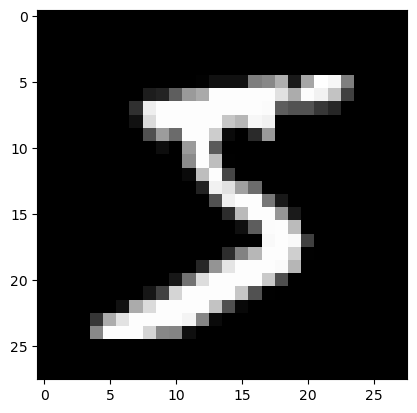

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(torchvision.utils.make_grid(trainset[0][0]))

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(64*5*5, 128)  # Adjusted input size here
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 64*5*5)  # Adjusted view size here
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

# Test the network
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


[1,   100] loss: 0.616
[1,   200] loss: 0.159
[1,   300] loss: 0.119
[1,   400] loss: 0.091
[1,   500] loss: 0.082
[1,   600] loss: 0.082
[1,   700] loss: 0.067
[1,   800] loss: 0.068
[1,   900] loss: 0.061
[2,   100] loss: 0.053
[2,   200] loss: 0.041
[2,   300] loss: 0.045
[2,   400] loss: 0.056
[2,   500] loss: 0.049
[2,   600] loss: 0.036
[2,   700] loss: 0.049
[2,   800] loss: 0.043
[2,   900] loss: 0.036
[3,   100] loss: 0.040
[3,   200] loss: 0.030
[3,   300] loss: 0.038
[3,   400] loss: 0.037
[3,   500] loss: 0.030
[3,   600] loss: 0.032
[3,   700] loss: 0.034
[3,   800] loss: 0.023
[3,   900] loss: 0.026
[4,   100] loss: 0.023
[4,   200] loss: 0.025
[4,   300] loss: 0.022
[4,   400] loss: 0.023
[4,   500] loss: 0.020
[4,   600] loss: 0.028
[4,   700] loss: 0.022
[4,   800] loss: 0.030
[4,   900] loss: 0.026
[5,   100] loss: 0.015
[5,   200] loss: 0.016
[5,   300] loss: 0.015
[5,   400] loss: 0.022
[5,   500] loss: 0.013
[5,   600] loss: 0.015
[5,   700] loss: 0.018
[5,   800] 